# Loading an OBO ontology into a `networkx` graph

Ontology are commonly represented as knowledge graphs, and the OBO language can express an ontology as an RDF graph, with terms as nodes and relationships as edges. 

As an example, here is how the *hexose biosynthetic process* and its superclasses in the [Gene Ontology](http://geneontology.org/docs/ontology-documentation/) can be represented as a graph, with edges showing the `rdfs:subClassOf` relationships:

[![graph.png](./graph.png)](https://amigo.geneontology.org/amigo/term/GO:0019319)



`fastobo` can be used to load the data from an OBO document and to build a graph using [NetworkX](https://networkx.org/), a graph library for Python. For this example, we will use the [Phenotype And Trait Ontology](http://www.obofoundry.org/ontology/pato.html). Let's start by creating an empty `DiGraph`:

In [1]:
import networkx
knowledge_graph = networkx.DiGraph()

To load the latest version of PATO, we can use the Persistent URL form the OBO library which always resolves to the most up-to-date version:

In [2]:
import urllib.request
import fastobo

with urllib.request.urlopen("http://purl.obolibrary.org/obo/pato.obo") as response:
    pato = fastobo.load(response)

Now, we can populate the knowledge graph with all the terms that were just loaded, and add a link for every `is_a` clause appearing:

In [3]:
for frame in pato:
    if isinstance(frame, fastobo.term.TermFrame):
        knowledge_graph.add_node(str(frame.id))
        for clause in frame:           
            if isinstance(clause, fastobo.term.IsAClause):
                knowledge_graph.add_edge(str(frame.id), str(clause.term))

Most OBO ontologies are DAGs, and PATO should be one as well:

In [4]:
networkx.is_directed_acyclic_graph(knowledge_graph)

True

Now, we can have a look at only a portion of the graph, just like in the GO term example. Let's use `networkx.descendants` to extract the superclasses of an arbitrary PATO term:

In [5]:
superclass_nodes = networkx.descendants(knowledge_graph, "PATO:0000297")
superclass_nodes.add("PATO:0000297")
super_graph = knowledge_graph.subgraph(superclass_nodes)

We can then draw the subgraph of `PATO:0000297` and its superclasses using the drawing capabilities of `networkx`:

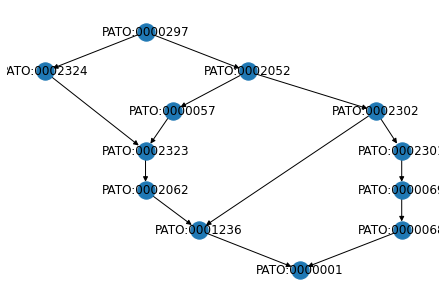

In [6]:
from networkx.drawing.nx_agraph import graphviz_layout
networkx.draw(super_graph, pos=graphviz_layout(super_graph, prog="dot"), with_labels=True, arrows=True)